In [2]:
## Importing all the required libraries

import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

#from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D

#PreProcess
from keras.preprocessing.image import ImageDataGenerator

Ref: https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook/35061341#35061341

In [6]:
## Mounting google drie where the dataset of all images are present

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# File path 

'/content/drive/MyDrive/DM2/train'


'/content/drive/MyDrive/DM2/train'

In [7]:
# Interacting with Operatng System

import os

path = '/content/drive/MyDrive/DM2/' # replace with the path to your image folder
os.chdir(path)

In [9]:
train_dir = 'train'
val_dir = 'validation'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 29226 images belonging to 7 classes.
Found 7171 images belonging to 7 classes.


In [10]:
data = []

for subdir, dirs, files in os.walk(path):
    print(files)
    for filename in files:
        
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'): # add any other image extensions you want to include
            img = cv2.imread(os.path.join(subdir, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert to RGB format
            img = cv2.resize(img, (224, 224)) # resize image to 224 x 224
            data.append([filename, img])

df = pd.DataFrame(data, columns=['filename', 'image'])

[]
[]
['6221.jpg', '5625.jpg', '9692.jpg', '8283.jpg', '6859.jpg', '346.jpg', '4735.jpg', '5353.jpg', '5630.jpg', '34563.jpg', '970.jpg', '4061.jpg', '3498.jpg', '3816.jpg', '34523.jpg', '423.jpg', '5916.jpg', '6757.jpg', '35104.jpg', '793.jpg', '4007.jpg', '931.jpg', '9907.jpg', '4211.jpg', '604.jpg', '3619.jpg', '3806.jpg', '9494.jpg', '7789.jpg', '725.jpg', '35614.jpg', '9045.jpg', '9559.jpg', '4704.jpg', '4282.jpg', '6862.jpg', '8107.jpg', '7660.jpg', '4599.jpg', '8241.jpg', '3505.jpg', '35882.jpg', '8414.jpg', '6195.jpg', '979.jpg', '6741.jpg', '9824.jpg', '8884.jpg', '8125.jpg', '3557.jpg', '3588.jpg', '34769.jpg', '5382.jpg', '35781.jpg', '35208.jpg', '6585.jpg', '557.jpg', '8411.jpg', '5479.jpg', '5734.jpg', '35018.jpg', '382.jpg', '35450.jpg', '4711.jpg', '4551.jpg', '8527.jpg', '4151.jpg', '4903.jpg', '7695.jpg', '936.jpg', '717.jpg', '874.jpg', '8319.jpg', '35679.jpg', '6027.jpg', '6974.jpg', '7055.jpg', '7041.jpg', '9210.jpg', '9438.jpg', '6873.jpg', '35451.jpg', '9987.jpg'

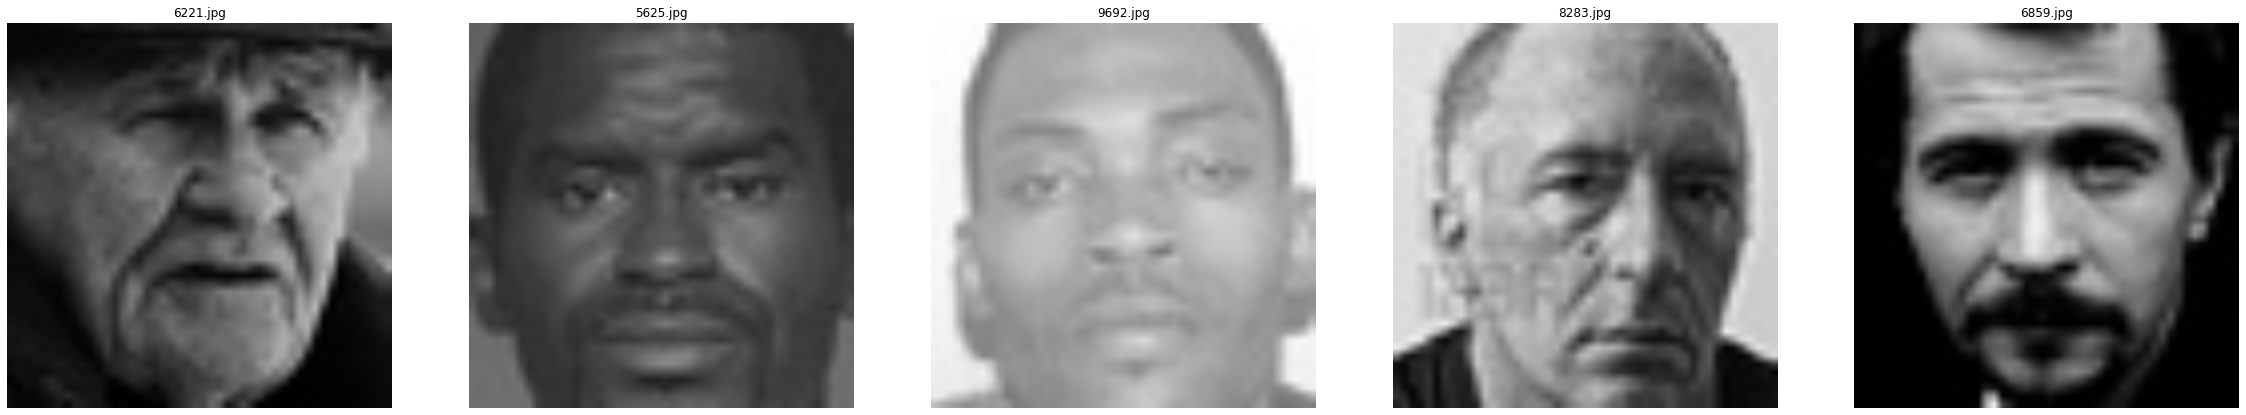

In [11]:
import matplotlib.pyplot as plt

# Display the first 10 images in the DataFrame
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(40, 80))
for i, ax in enumerate(axes.flat):
    ax.imshow(df['image'][i])
    ax.set_title(df['filename'][i])
    ax.axis('off')
plt.show()

model 1

In [ ]:
#Creating a CNN Model

emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape=(150,150,3)))
model1.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model1.add(Conv2D(filters = 16,  kernel_size = (5,5),padding = 'Same', activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model1.add( Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same',activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model1.add( Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dense(3, activation = 'softmax'))

In [ ]:
# Compiling and training model using the categorical cross-entropy loss function

emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=29226 // 256,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=7171 // 64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
83/83 [==============================] - 8s 83ms/step - loss: 0.7321 - accuracy: 0.6619 - val_loss: 0.4683 - val_accuracy: 0.8769
Epoch 2/10
83/83 [==============================] - 7s 79ms/step - loss: 0.5193 - accuracy: 0.8140 - val_loss: 0.4278 - val_accuracy: 0.8979
Epoch 3/10
83/83 [==============================] - 7s 80ms/step - loss: 0.5448 - accuracy: 0.8110 - val_loss: 0.4391 - val_accuracy: 0.8529
Epoch 4/10
83/83 [==============================] - 7s 81ms/step - loss: 0.4163 - accuracy: 0.8614 - val_loss: 0.3186 - val_accuracy: 0.8919
Epoch 5/10
83/83 [==============================] - 7s 80ms/step - loss: 0.3414 - accuracy: 0.8795 - val_loss: 0.1970 - val_accuracy: 0.9219
Epoch 6/10
83/83 [==============================] - 7s 79ms/step - loss: 0.2956 - accuracy: 0.8976 - val_loss: 0.2469 - val_accuracy: 0.9189
Epoch 7/10
83/83 [==============================] - 7s 81ms/step - loss: 0.2574 - accuracy: 0.9089 - val_loss: 0.1389 - val_accuracy: 0.9429
Epoch 8/10
83

model 2

In [ ]:
# Creating new model with additional layers, Conv2D and MaxPooling2D

emotion_model2 = Sequential()

emotion_model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model2.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model2.add(Dropout(0.25))

emotion_model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model2.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model2.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model2.add(Dropout(0.25))

emotion_model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model2.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model2.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model2.add(Dropout(0.25))

emotion_model2.add(Flatten())
emotion_model2.add(Dense(1024, activation='relu'))
emotion_model2.add(Dropout(0.5))
emotion_model2.add(Dense(7, activation='softmax'))

In [ ]:
emotion_model2.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=29226 // 256,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=7171 // 64)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


83/83 [==============================] - 8s 84ms/step - loss: 0.6128 - accuracy: 0.7026 - val_loss: 0.4566 - val_accuracy: 0.8709
Epoch 2/10
83/83 [==============================] - 7s 82ms/step - loss: 0.3224 - accuracy: 0.8878 - val_loss: 0.2657 - val_accuracy: 0.9129
Epoch 3/10
83/83 [==============================] - 7s 81ms/step - loss: 0.2657 - accuracy: 0.9172 - val_loss: 0.1662 - val_accuracy: 0.9459
Epoch 4/10
83/83 [==============================] - 7s 81ms/step - loss: 0.2320 - accuracy: 0.9111 - val_loss: 0.2090 - val_accuracy: 0.9309
Epoch 5/10
83/83 [==============================] - 7s 81ms/step - loss: 0.1894 - accuracy: 0.9337 - val_loss: 0.1368 - val_accuracy: 0.9670
Epoch 6/10
83/83 [==============================] - 7s 82ms/step - loss: 0.2223 - accuracy: 0.9202 - val_loss: 0.2033 - val_accuracy: 0.9339
Epoch 7/10
83/83 [==============================] - 7s 81ms/step - loss: 0.1679 - accuracy: 0.9435 - val_loss: 0.3038 - val_accuracy: 0.9039
Epoch 8/10
83/83 [======

model 3

In [ ]:
emotion_model3 = Sequential()

emotion_model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

emotion_model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model3.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model3.add(Dropout(0.25))

emotion_model3.add(Flatten())
emotion_model3.add(Dense(1024, activation='relu'))
emotion_model3.add(Dropout(0.5))
emotion_model3.add(Dense(7, activation='softmax'))

In [ ]:
emotion_model3.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=29226 // 256,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7171 // 64)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


83/83 [==============================] - 8s 90ms/step - loss: 0.6768 - accuracy: 0.7048 - val_loss: 0.3749 - val_accuracy: 0.8829
Epoch 2/10
83/83 [==============================] - 7s 85ms/step - loss: 0.3478 - accuracy: 0.8795 - val_loss: 0.3223 - val_accuracy: 0.8919
Epoch 3/10
83/83 [==============================] - 8s 94ms/step - loss: 0.2462 - accuracy: 0.9194 - val_loss: 0.2282 - val_accuracy: 0.9249
Epoch 4/10
83/83 [==============================] - 7s 85ms/step - loss: 0.2199 - accuracy: 0.9202 - val_loss: 0.2305 - val_accuracy: 0.9399
Epoch 5/10
83/83 [==============================] - 7s 85ms/step - loss: 0.2028 - accuracy: 0.9315 - val_loss: 0.1411 - val_accuracy: 0.9670
Epoch 6/10
83/83 [==============================] - 7s 85ms/step - loss: 0.1904 - accuracy: 0.9345 - val_loss: 0.1371 - val_accuracy: 0.9520
Epoch 7/10
83/83 [==============================] - 8s 101ms/step - loss: 0.1849 - accuracy: 0.9390 - val_loss: 0.2348 - val_accuracy: 0.9369
Epoch 8/10
83/83 [=====

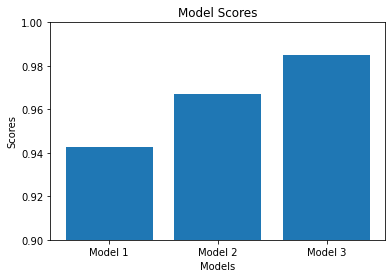

In [1]:
#graph for accuraies
import matplotlib.pyplot as plt

models = ['Model 1', 'Model 2', 'Model 3']
scores = [0.9429, 0.9670, 0.9850]

plt.bar(models, scores)
plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.ylim(0.9, 1.0)
plt.show()
